<a href="https://colab.research.google.com/github/sairamadithya/facial-feature-classification-for-autism/blob/main/facial_features_for_autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

This dataset consists of facial images pertaining to both autistic and non-autistic children. The dataset consists of 5500 training and 300 testing images.

In [ ]:
!unzip '/content/drive/MyDrive/autism.zip'

I have used the imagedatagenerator to produce samples from the given image datasets by applying the specified transforms. the same transforms are being applied to the testing datatset also.

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/archive (5)/AutismDataset/train',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
    '/content/archive (5)/AutismDataset/valid',
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'binary')

Found 5580 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


I have developed a transfer learning based VGG16 model for this task. I have added certain custom layers in order to overcome overfitting.

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 512)        0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                           

the model is complied using adam optimiser, crossentropy loss function and following metrics.

accuracy

AUC

precision

recall

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=160
    )

Epoch 1/15
160/160 [==============================] - 66s 328ms/step - loss: 0.9091 - accuracy: 0.4820 - auc: 0.4933 - precision: 0.4790 - recall: 0.4843 - val_loss: 0.7682 - val_accuracy: 0.5900 - val_auc: 0.5946 - val_precision: 0.5860 - val_recall: 0.6133
Epoch 2/15
160/160 [==============================] - 49s 306ms/step - loss: 0.7933 - accuracy: 0.5523 - auc: 0.5837 - precision: 0.5376 - recall: 0.5575 - val_loss: 0.6903 - val_accuracy: 0.5733 - val_auc: 0.6526 - val_precision: 0.5965 - val_recall: 0.4533
Epoch 3/15
160/160 [==============================] - 49s 308ms/step - loss: 0.7393 - accuracy: 0.5918 - auc: 0.6343 - precision: 0.5896 - recall: 0.6103 - val_loss: 0.6555 - val_accuracy: 0.6467 - val_auc: 0.6978 - val_precision: 0.6571 - val_recall: 0.6133
Epoch 4/15
160/160 [==============================] - 50s 309ms/step - loss: 0.6852 - accuracy: 0.6309 - auc: 0.6828 - precision: 0.6260 - recall: 0.6442 - val_loss: 0.6338 - val_accuracy: 0.6700 - val_auc: 0.7291 - val_pre

the model has produced the following results:

training accuracy= 75.4%

training loss= 0.5199

training precision= 74.47%

training recall= 77.35%

training AUC= 0.8282

In [ ]:
model.evaluate(train_generator)

349/349 [==============================] - 97s 278ms/step - loss: 0.5199 - accuracy: 0.7541 - auc: 0.8282 - precision: 0.7447 - recall: 0.7735


[0.5198630094528198,
 0.7541218400001526,
 0.8282132148742676,
 0.7446514964103699,
 0.7734767198562622]

the model has produced the following results:

validation accuracy= 74.3%

validation loss= 0.5749

validation precision= 72.96%

validation recall= 77.33%

validation AUC= 0.8109

In [ ]:
model.evaluate(validation_generator)

19/19 [==============================] - 5s 277ms/step - loss: 0.5749 - accuracy: 0.7433 - auc: 0.8109 - precision: 0.7296 - recall: 0.7733


[0.5749179124832153,
 0.7433333396911621,
 0.8108667135238647,
 0.7295597195625305,
 0.7733333110809326]

In [ ]:
tf.keras.models.save_model(model,'mymodel.hdf5')

[[0.07165647]]
THE UPLOADED IMAGE SEEMS TO BE: AUTISTIC


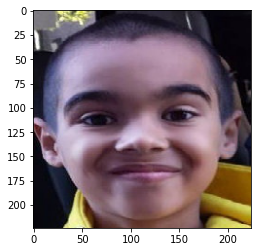

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/archive (5)/AutismDataset/valid/autistic/Autistic.110.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.50:
  op="AUTISTIC"
else:
  op="NON-AUTISTIC "
plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))  


In [ ]:
!pip install streamlit

I have developed a website that asks the child frontal facial image from the user in the form of JPG, PNG or JPEG. Once that is uploaded, it will classify whether the child has autism or not.

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import pandas as pd
from bokeh.models.widgets import Button
from bokeh.models import CustomJS
from streamlit_bokeh_events import streamlit_bokeh_events
global op1,op2,op3,op4,op5

html_temp = """ 
  <div style="background-color:pink ;padding:10px">
  <h2 style="color:white;text-align:center;">TOOL FOR EARLY STAGE AUTISM DETECTION IN CHILDREN ⚕️⚕️⚕️</h2>
  </div>
  """ 
st.markdown(html_temp, unsafe_allow_html=True) 
@st.cache(allow_output_mutation=True)
def load_model():
   model=tf.keras.models.load_model('/content/mymodel.hdf5')
   return model
  with st.spinner('Model is being loaded..'):
    model=load_model()
  file = st.file_uploader("Please upload any image from the local machine in case of computer or upload camera image in case of mobile.", type=["jpg", "png","jpeg"])
  import cv2
  import numpy as np
  st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
     st.text("Please upload an image file within the allotted file size")
else:
     img = Image.open(file)
     st.image(img, use_column_width=False)
     size = (224,224)    
     image = ImageOps.fit(img, size, Image.ANTIALIAS)
     imag = np.asarray(image)
     imaga = np.expand_dims(imag,axis=0) 
     predictions = model.predict(imaga)
     #predictions = import_and_predict(image, model)
     a=predictions[0]
if a<0.51:
       st.error('The subject under observation may have the symptoms of AUTISM. Please ensure that you consult with a professional before pursuing any kinds of treatment.')
       #op1= 1
elif a>0.52:
       st.success('The subject under observation might not have the symptoms of AUTISM. Please ensure that you consult with a professional or confirm with the other modalities present in the tool.') 
       #op1= 0
       st.warning('the model is only 85% accurate. this is the beta version of the model. Futher enhancements has to made to get the best results.')

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501